In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
folder_path = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\Segmentation Scores on Interpolations"

In [3]:
df_pre = pd.read_csv(os.path.join(folder_path, '2D_versatile_he.csv'))
df_20 = pd.read_csv(os.path.join(folder_path, 'SD_HE_20x.csv'))
df_con = pd.read_csv(os.path.join(folder_path, 'HN_CoNSeP.csv'))
df_cpm = pd.read_csv(os.path.join(folder_path, 'HN_CPM17.csv'))
df_kum = pd.read_csv(os.path.join(folder_path, 'HN_Kumar.csv'))

In [4]:
ordering = ['L - 40x - __',
            'L - 20x - 0_', 'L - 20x - 1_', 'L - 20x - 3_',
            'L - 40x - 00', 'L - 40x - 01', 'L - 40x - 03',
            'L - 40x - 10', 'L - 40x - 11', 'L - 40x - 13',
            'L - 40x - 30', 'L - 40x - 31', 'L - 40x - 33',
            'R - 20x - 33', 'R - 20x - 31', 'R - 20x - 30',
            'R - 20x - 13', 'R - 20x - 11', 'R - 20x - 10',
            'R - 20x - 03', 'R - 20x - 01', 'R - 20x - 00',
            'R - 40x - 3_', 'R - 40x - 1_', 'R - 40x - 0_',
            'R - 20x - __']

In [5]:
df_pre['Interpolation'] = pd.Categorical(df_pre['Interpolation'], categories=ordering, ordered=True)
df_pre = df_pre.sort_values(by='Interpolation')
df_20['Interpolation'] = pd.Categorical(df_20['Interpolation'], categories=ordering, ordered=True)
df_20 = df_20.sort_values(by='Interpolation')
df_con['Interpolation'] = pd.Categorical(df_con['Interpolation'], categories=ordering, ordered=True)
df_con = df_con.sort_values(by='Interpolation')
df_cpm['Interpolation'] = pd.Categorical(df_cpm['Interpolation'], categories=ordering, ordered=True)
df_cpm = df_cpm.sort_values(by='Interpolation')
df_kum['Interpolation'] = pd.Categorical(df_kum['Interpolation'], categories=ordering, ordered=True)
df_kum = df_kum.sort_values(by='Interpolation')
df_pre.head()

,Model,Interpolation,Dataset,Tile,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality
18576,2D_versatile_he,L - 40x - __,CoNSeP,test_1,0.1,321,1,544,0.996894,0.371098,0.540859,0.375358
19614,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.4,615,52,105,0.922039,0.854167,0.886806,0.675510
19613,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.3,622,45,98,0.932534,0.863889,0.896900,0.679076
19612,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.2,623,44,97,0.934033,0.865278,0.898342,0.679495
19611,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.1,623,44,97,0.934033,0.865278,0.898342,0.679495


In [6]:
df_pre = df_pre[df_pre['Tau'] == 0.5]
df_pre = df_pre.groupby(by=['Interpolation']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],
                                                  'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
df_20 = df_20.groupby(by=['Interpolation']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],
                                                  'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
df_con = df_con.groupby(by=['Interpolation']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],
                                                  'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
df_cpm = df_cpm.groupby(by=['Interpolation']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],
                                                  'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
df_kum = df_kum.groupby(by=['Interpolation']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],
                                                  'Panoptic Quality': ['mean', 'std']}).reset_index(drop=False)
df_20

Interpolation Precision              Recall            F1-Score             
                      mean       std      mean       std      mean       std   
0   L - 40x - __  0.481360  0.200646  0.545760  0.192942  0.505068  0.191806  \
1   L - 20x - 0_  0.862445  0.120094  0.787265  0.141720  0.819643  0.126552   
2   L - 20x - 1_  0.870728  0.120269  0.793962  0.146613  0.827040  0.130035   
3   L - 20x - 3_  0.865988  0.125612  0.791411  0.148760  0.823460  0.133609   
4   L - 40x - 00  0.423362  0.201087  0.532072  0.190009  0.463939  0.193545   
5   L - 40x - 01  0.462365  0.201882  0.476412  0.201035  0.461470  0.193940   
6   L - 40x - 03  0.460113  0.201182  0.505181  0.195440  0.474621  0.192287   
7   L - 40x - 10  0.428285  0.201712  0.528319  0.188237  0.465631  0.192711   
8   L - 40x - 11  0.469819  0.194460  0.468600  0.196459  0.460539  0.187930   
9   L - 40x - 13  0.460331  0.200240  0.493054  0.201090  0.468825  0.193564   
10  L - 40x - 30  0.427771  0.200247  0.532624  0.189657  0.467148  0.192974   
11  L - 40x - 31  0.465647  0.197367  0.479082  0.198321  0.464500  0.190301   
12  L - 40x - 33  0.461543  0.204366  0.503529  0.201545  0.474644  0.196204   
13  R - 20x - 33  0.770856  0.120311  0.666688  0.115299  0.710360  0.104419   
14  R - 20x - 31  0.771669  0.117353  0.662565  0.115468  0.708621  0.103847   
15  R - 20x - 30  0.765831  0.117875  0.657198  0.114749  0.702983  0.103671   
16  R - 20x - 13  0.771483  0.117453  0.661658  0.118136  0.708165  0.106163   
17  R - 20x - 11  0.773256  0.108872  0.661451  0.114821  0.708685  0.099709   
18  R - 20x - 10  0.768812  0.119584  0.657469  0.120086  0.704404  0.108111   
19  R - 20x - 03  0.757067  0.128519  0.658040  0.117147  0.699103  0.108608   
20  R - 20x - 01  0.772080  0.117107  0.667231  0.114553  0.711332  0.102616   
21  R - 20x - 00  0.770341  0.119468  0.660914  0.119353  0.707135  0.107442   
22  R - 40x - 3_  0.276361  0.161402  0.410761  0.166534  0.320949  0.169117   
23  R - 40x - 1_  0.301135  0.168331  0.419232  0.167626  0.339932  0.170791   
24  R - 40x - 0_  0.265481  0.156192  0.453506  0.163195  0.324352  0.169993   
25  R - 20x - __  0.763653  0.122679  0.661343  0.115064  0.704170  0.105305   

   Panoptic Quality            
               mean       std  
0          0.361767  0.150662  
1          0.627240  0.126756  
2          0.641112  0.137059  
3          0.635922  0.135941  
4          0.325520  0.146269  
5          0.324014  0.145053  
6          0.333744  0.145689  
7          0.324945  0.144812  
8          0.321248  0.141193  
9          0.328437  0.145023  
10         0.326750  0.145507  
11         0.324961  0.142895  
12         0.333112  0.147438  
13         0.528992  0.092999  
14         0.528711  0.093539  
15         0.517645  0.090688  
16         0.528979  0.094550  
17         0.530033  0.091270  
18         0.519272  0.093578  
19         0.520263  0.095922  
20         0.529780  0.092490  
21         0.526242  0.094776  
22         0.219743  0.117838  
23         0.233106  0.119066  
24         0.222649  0.119572  
25         0.524298  0.093908

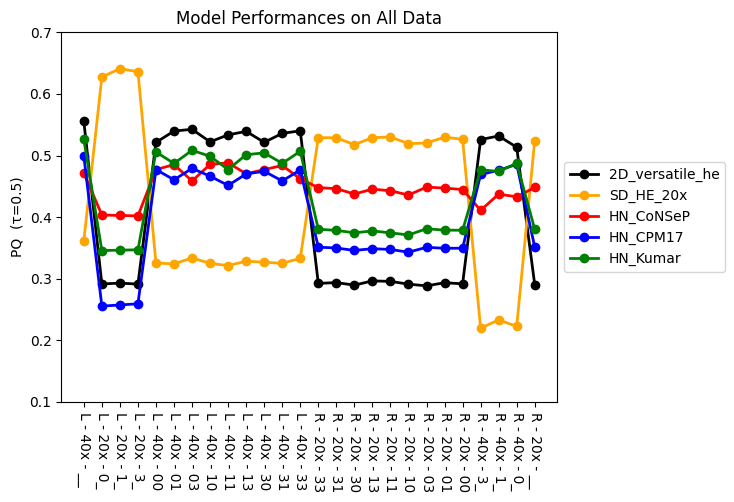

In [8]:
fig, ax = plt.subplots()
ax.plot(df_pre[('Interpolation', '')], df_pre[('Panoptic Quality', 'mean')], marker='o', color='black', linewidth=2, label='2D_versatile_he')
ax.plot(df_20[('Interpolation', '')], df_20[('Panoptic Quality', 'mean')], marker='o', color='orange', linewidth=2, label='SD_HE_20x')
ax.plot(df_con[('Interpolation', '')], df_con[('Panoptic Quality', 'mean')], marker='o', color='red', linewidth=2, label='HN_CoNSeP')
ax.plot(df_cpm[('Interpolation', '')], df_cpm[('Panoptic Quality', 'mean')], marker='o', color='blue', linewidth=2, label='HN_CPM17')
ax.plot(df_kum[('Interpolation', '')], df_kum[('Panoptic Quality', 'mean')], marker='o', color='green', linewidth=2, label='HN_Kumar')
# ax.errorbar(df_pre[('Interpolation', '')], df_pre[('Panoptic Quality', 'mean')], yerr=df_pre[('Panoptic Quality', 'std')], label='2D_versatile_he', fmt='o', capsize=0)
# ax.errorbar(df_20[('Interpolation', '')], df_20[('Panoptic Quality', 'mean')], yerr=df_20[('Panoptic Quality', 'std')], label='2D_versatile_he', fmt='o', capsize=0)
# ax.errorbar(df_20[('Interpolation', '')], df_20[('Panoptic Quality', 'mean')], yerr=df_20[('Panoptic Quality', 'std')], label='2D_versatile_he', fmt='o', capsize=0)
# ax.errorbar(df_20[('Interpolation', '')], df_20[('Panoptic Quality', 'mean')], yerr=df_20[('Panoptic Quality', 'std')], label='2D_versatile_he', fmt='o', capsize=0)
# ax.errorbar(df_20[('Interpolation', '')], df_20[('Panoptic Quality', 'mean')], yerr=df_20[('Panoptic Quality', 'std')], label='2D_versatile_he', fmt='o', capsize=0)
ax.set_ylabel('PQ  (τ=0.5)')
ax.set_ylim(0.1, 0.7)
ax.set_title('Model Performances on All Data')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=270)
plt.savefig('chart.png', bbox_inches='tight')
plt.show()